In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [60]:
# Import libraries

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch

import my_functions as func

In [4]:
"""
Main program

"""

char_dict = func.make_dict(func.load_results(), func.load_layout())

# save_dict(char_dict)

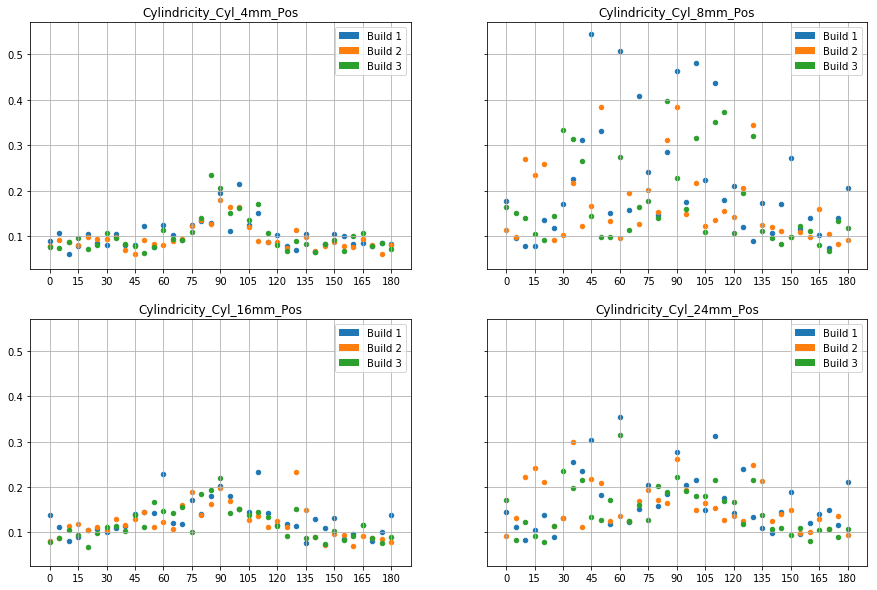

In [37]:
"""
Plot the cylindricity error versus orientation of convex cylinders of diameters 4, 8, 16 and 24 mm.

"""

# List of characteristics to plot
chars = ['Cylindricity_Cyl_4mm_Pos',\
         'Cylindricity_Cyl_8mm_Pos',\
         'Cylindricity_Cyl_16mm_Pos',\
         'Cylindricity_Cyl_24mm_Pos']

# Define colors
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Initialize empty list for legend elements
legend_elements = []

# Define and append legend elements
for i in range(3):
    legend_elements.append(Patch(facecolor=colors[i], label="Build {}".format(i+1)))

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Remove all specimen rotated -90 degrees
dfs = func.exclude_values('angle', -90, dfs)

# Extract the error, angle and build columns to a list of data
data = func.get_column(['error', 'angle', 'build'], dfs)

# Convert to groupby-objects 
for i in range(len(data)):
    data[i] = data[i].groupby('build')

# Calculate required number of subplots (grid of x_len * y_len)
x_len = int(len(data)/2)
y_len = len(data) - x_len

# Create figure
fig, axs = plt.subplots(ncols=x_len, nrows=y_len, sharey=True, figsize=(15, 10))

# Plot data
for i in range(len(data)):
    j, k = int(i/2), i%2
    axs[j, k].grid(True)
    axs[j, k].set_xticks(range(0, 181, 15))
    axs[j, k].set_title(chars[i])
    axs[j, k].legend(handles=legend_elements)
    
    for name, group in data[i]:
        axs[j, k].scatter(group.angle, group.error, s=20, c=colors[int(name)-1])


# Display plot
plt.show()

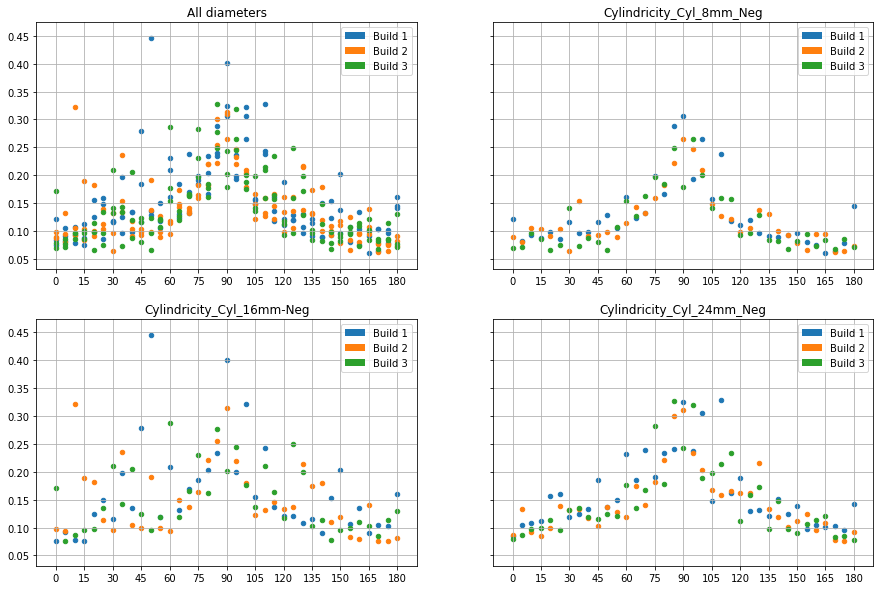

In [82]:
"""
Plot the cylindricity error versus orientation of concave cylinders of diameters 8, 16 and 24 mm.

"""

# List of characteristics to plot
chars = ['Cylindricity_Cyl_8mm_Neg',\
         'Cylindricity_Cyl_8mm_Neg',\
         'Cylindricity_Cyl_16mm-Neg',\
         'Cylindricity_Cyl_24mm_Neg']

# Define colors
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Initialize empty list for legend elements
legend_elements = []

# Define and append legend elements
for i in range(3):
    legend_elements.append(Patch(facecolor=colors[i], label="Build {}".format(i+1)))

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Let the first element include all diameters
dfs[0] = pd.concat([dfs[1], dfs[2], dfs[3]])
chars[0] = 'All diameters'

# Remove all specimen rotated -90 degrees
dfs = func.exclude_values('angle', -90, dfs)

# Extract the error, angle and build columns to a list of data
data = func.get_column(['error', 'angle', 'build'], dfs)

# Convert to groupby-objects 
for i in range(len(data)):
    data[i] = data[i].groupby('build')
    
# Calculate required number of subplots (grid of x_len * y_len)
x_len = math.ceil(len(data)/2)
y_len = math.ceil(len(data)/x_len)

# Create figure
fig, axs = plt.subplots(x_len, y_len, sharey=True, figsize=(15, 10))

# Plot data
for i in range(len(data)):
    j, k = int(i/2), i%2
    axs[j, k].grid(True)
    axs[j, k].set_xticks(range(0, 181, 15))
    axs[j, k].set_title(chars[i])
    axs[j, k].legend(handles=legend_elements)
    
    for name, group in data[i]:
        axs[j, k].scatter(group.angle, group.error, s=20, c=colors[int(name)-1])

# Display plot
plt.show()

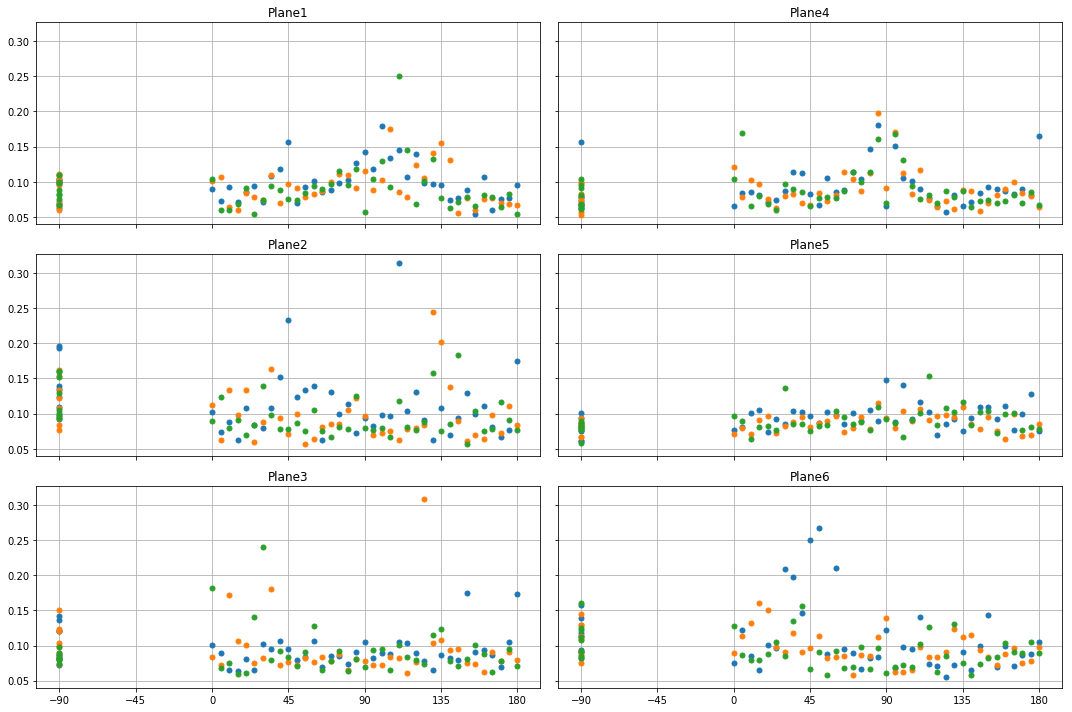

In [36]:
"""
Plot the error versus orientation of the planes at HX1.

"""

# Get relevant dataframes from the dictionary
df1 = char_dict['Flatness_HX1_Plane1']
df2 = char_dict['Flatness_HX1_Plane2']
df3 = char_dict['Flatness_HX1_Plane3']
df4 = char_dict['Flatness_HX1_Plane4']
df5 = char_dict['Flatness_HX1_Plane5']
df6 = char_dict['Flatness_HX1_Plane6']


# Group by build to enable separate colors of builds 1, 2 and 3
groups1 = df1.groupby('build')
groups2 = df2.groupby('build')
groups3 = df3.groupby('build')
groups4 = df4.groupby('build')
groups5 = df5.groupby('build')
groups6 = df6.groupby('build')


# Shared parameters (marker size and shape)
pnt_s = 5
mrk = 'o'


# Create figure of 3 by 2 plots sharing x and y axes
fig, axs = plt.subplots(3, 2, sharex = True, sharey=True, figsize=(15, 10))
axs[0, 0].set_xticks(range(-90, 181, 45))


# Set titles of the six plots
axs[0, 0].set_title("Plane1")
axs[0, 1].set_title("Plane4")
axs[1, 0].set_title("Plane2")
axs[1, 1].set_title("Plane5")
axs[2, 0].set_title("Plane3")
axs[2, 1].set_title("Plane6")


# Set grid for all six plots
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[1, 0].grid(True)
axs[1, 1].grid(True)
axs[2, 0].grid(True)
axs[2, 1].grid(True)


# Create six plots - one for each plane
for name, group in groups1:
    axs[0, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane1")
    
for name, group in groups2:
    axs[1, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane4")
    
for name, group in groups3:
    axs[2, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane2")
    
for name, group in groups4:
    axs[0, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane5")

for name, group in groups5:
    axs[1, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane3")

for name, group in groups6:
    axs[2, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane6")
    

# Display plot
fig.tight_layout()
plt.show()

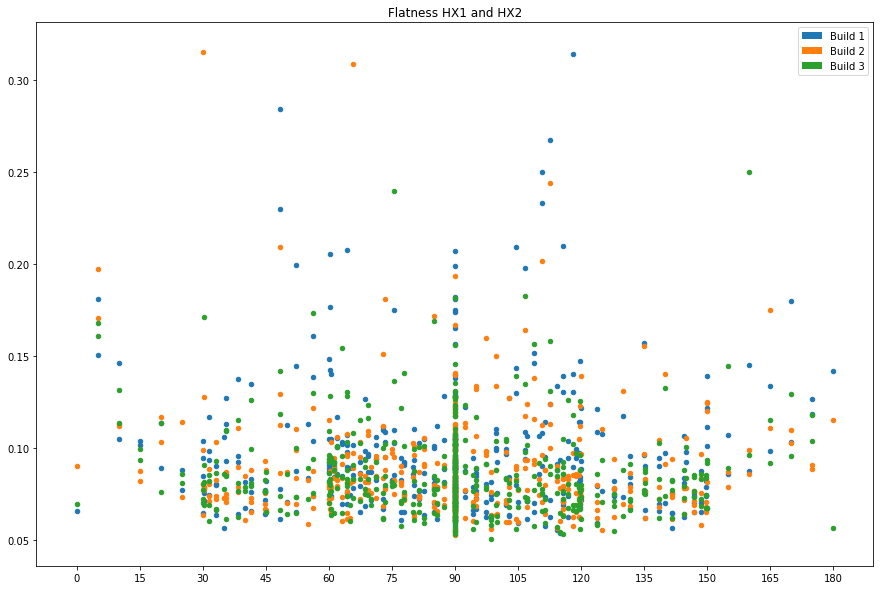

In [71]:
"""
Plot the flatness error of planes with respect to offset from z-direction.

"""

df_planes = func.get_planes(char_dict)
        
# Define colors
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Initialize empty list for legend elements
legend_elements = []

# Define and append legend elements
for i in range(3):
    legend_elements.append(Patch(facecolor=colors[i], label="Build {}".format(i+1)))

# Remove all specimen rotated -90 degrees
df_planes = df_planes[df_planes['angle'] != -90]

# Remove any duplicated columns
df_planes = df_planes.loc[:,~df_planes.columns.duplicated()]

# Extract the error, angle and build columns
df_planes = df_planes[['error', 'angle_z', 'build']]

# Convert to groupby-object
gb_planes = df_planes.groupby('build')

# Create a single figure for all planes
fig, ax = plt.subplots(figsize=(15, 10))

# Define details
ax.set_xticks(range(0, 181, 15))
ax.set_title("Flatness HX1 and HX2")
ax.legend(handles=legend_elements)

# Plot all the data
for name, group in gb_planes:
    ax.scatter(group['angle_z'], group['error'], s=20, c=colors[int(name)-1])

# Display plot
plt.show()

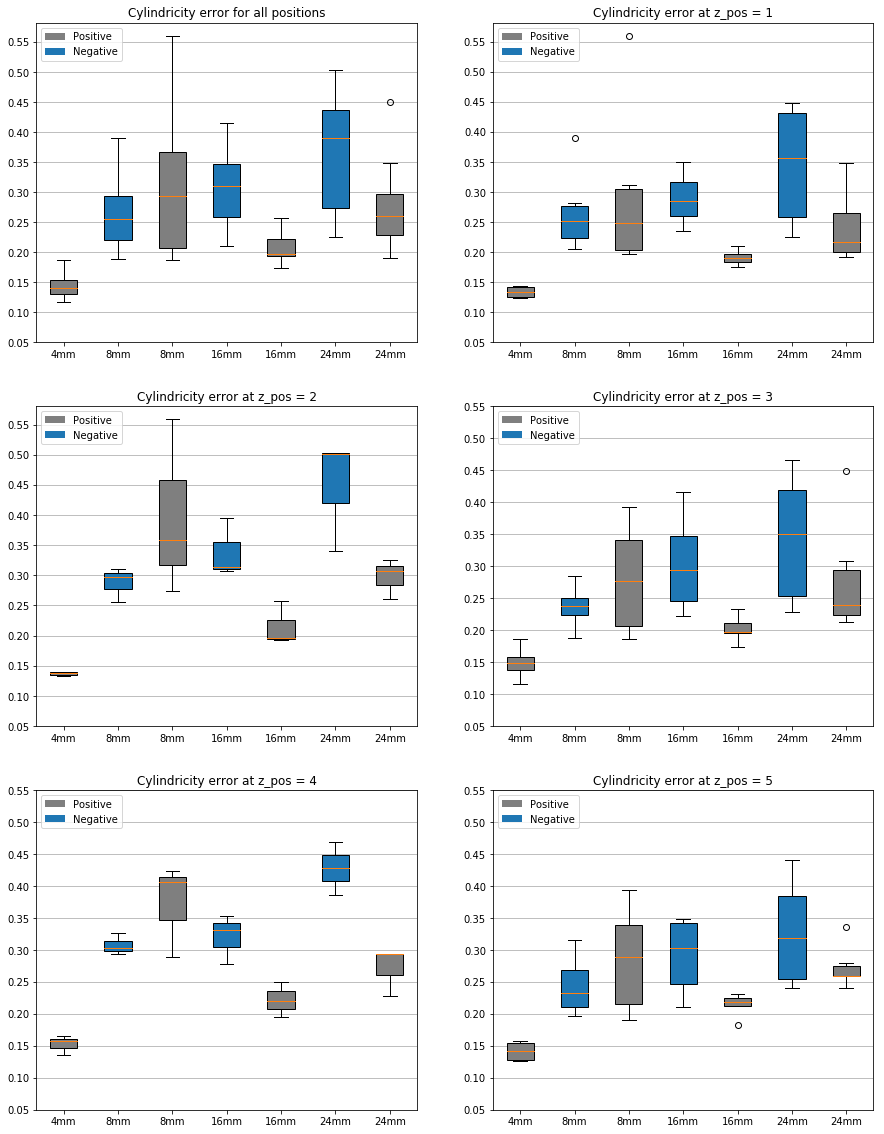

In [81]:
"""
Boxplots showing the variation in cylindricity of different dimension cylinders with respect to the z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# List of lables for the boxplots
labels = ['4mm', '8mm', '8mm', '16mm', '16mm', '24mm', '24mm']

# Define colors
color1, color2 = 'tab:gray', 'tab:blue'

# Assign colors to boxes
colors = [color1, color2, color1, color2, color1, color2, color1]

# Define legend elements
legend_elements = [Patch(facecolor=color1, label='Positive'),\
                  Patch(facecolor=color2, label='Negative')]

# list of handles to the boxes
bplots = []

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
dfs = func.get_single_values('angle', -90, dfs)

# First element of data-list contains all error values
data = [func.get_column('error', dfs)]

# Append to the data-list the z-layers one-by-one
for i in range(1,6):
    data.append(func.get_column('error', func.get_single_values('z_pos', i, dfs)))

# Initialize figure as a grid of plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

# Construct each plot
for i in range(3):
    for j in range(2):
        bplots.append(axs[i, j].boxplot(data[(i*2)+j], patch_artist=True, labels=labels))
        axs[i, j].set_title("Cylindricity error at z_pos = {}".format((i*2)+j))
        axs[i, j].legend(handles=legend_elements, loc='upper left')
        axs[i, j].set_yticks([0.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55])
        axs[i, j].yaxis.grid(True)

# Set color to the boxplots
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Revise title of first plot
axs[0, 0].set_title("Cylindricity error for all positions")

# Display figure
plt.show()

In [ ]:
"""
Plot the error versus orientation of the planes at HX2.

"""

# Get relevant dataframes from the dictionary
df1 = char_dict['Flatness_HX2_Plane1']
df2 = char_dict['Flatness_HX2_Plane2']
df3 = char_dict['Flatness_HX2_Plane3']
df4 = char_dict['Flatness_HX2_Plane4']
df5 = char_dict['Flatness_HX2_Plane5']
df6 = char_dict['Flatness_HX2_Plane6']


# Group by build to enable separate colors of builds 1, 2 and 3
groups1 = df1.groupby('build')
groups2 = df2.groupby('build')
groups3 = df3.groupby('build')
groups4 = df4.groupby('build')
groups5 = df5.groupby('build')
groups6 = df6.groupby('build')


# Shared parameters (marker size and shape)
pnt_s = 5
mrk = 'o'


# Create figure of 3 by 2 plots sharing x and y axes
fig, axs = plt.subplots(3, 2, sharex = True, sharey=True, figsize=(15, 10))
axs[0, 0].set_xticks(range(-90, 181, 45))


# Set titles of the six plots
axs[0, 0].set_title("Plane1")
axs[0, 1].set_title("Plane4")
axs[1, 0].set_title("Plane2")
axs[1, 1].set_title("Plane5")
axs[2, 0].set_title("Plane3")
axs[2, 1].set_title("Plane6")


# Set grid for all six plots
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[1, 0].grid(True)
axs[1, 1].grid(True)
axs[2, 0].grid(True)
axs[2, 1].grid(True)


# Create six plots - one for each plane
for name, group in groups1:
    axs[0, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane1")
    
for name, group in groups2:
    axs[1, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane4")
    
for name, group in groups3:
    axs[2, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane2")
    
for name, group in groups4:
    axs[0, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane5")

for name, group in groups5:
    axs[1, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane3")

for name, group in groups6:
    axs[2, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane6")
    

# Display plot
fig.tight_layout()
plt.show()

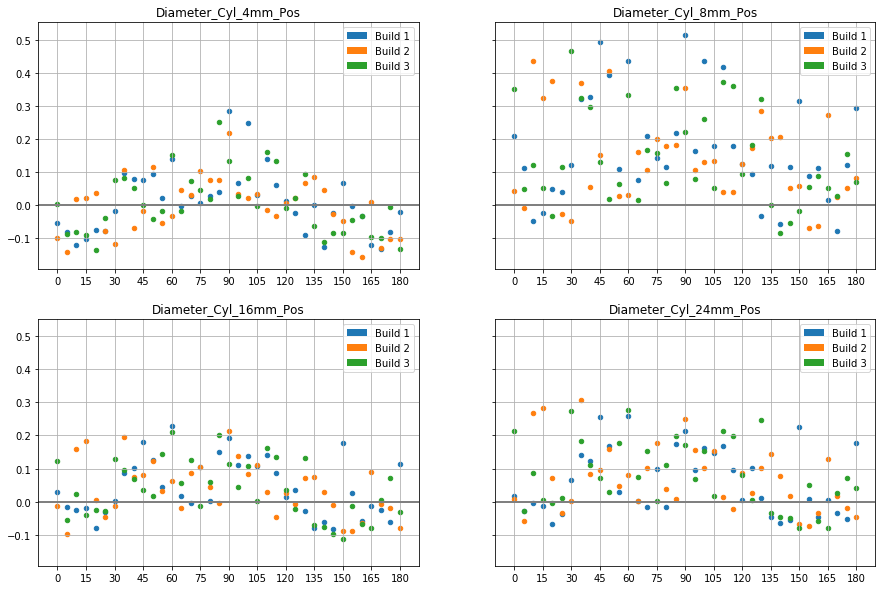

In [104]:
"""
Plot the dimensional error versus orientation of convex cylinders of diameters 4, 8, 16 and 24 mm.

"""

# List of characteristics to plot
chars = ['Diameter_Cyl_4mm_Pos',\
         'Diameter_Cyl_8mm_Pos',\
         'Diameter_Cyl_16mm_Pos',\
         'Diameter_Cyl_24mm_Pos']

# Define colors
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Initialize empty list for legend elements
legend_elements = []

# Define and append legend elements
for i in range(3):
    legend_elements.append(Patch(facecolor=colors[i], label="Build {}".format(i+1)))

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Remove all specimen rotated -90 degrees
dfs = func.exclude_values('angle', -90, dfs)

# Extract the error, angle and build columns to a list of data
data = func.get_column(['error', 'angle', 'build'], dfs)

# Convert to groupby-objects 
for i in range(len(data)):
    data[i] = data[i].groupby('build')

# Calculate required number of subplots (grid of x_len * y_len)
x_len = int(len(data)/2)
y_len = len(data) - x_len

# Create figure
fig, axs = plt.subplots(ncols=x_len, nrows=y_len, sharey=True, figsize=(15, 10))

# Plot data
for i in range(len(data)):
    j, k = int(i/2), i%2
    axs[j, k].grid(True)
    axs[j, k].set_xticks(range(0, 181, 15))
    axs[j, k].set_title(chars[i])
    axs[j, k].legend(handles=legend_elements)
    axs[j, k].set_xlim(-10, 190)
    axs[j, k].plot([-10, 190], [0, 0], c='gray', linewidth=2)
    
    for name, group in data[i]:
        axs[j, k].scatter(group.angle, group.error, s=20, c=colors[int(name)-1])


# Display plot
plt.show()

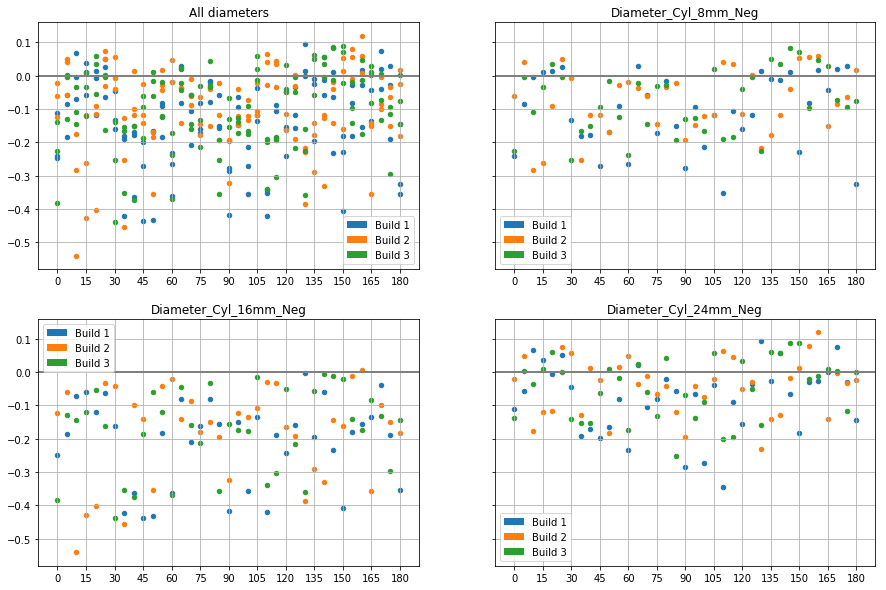

In [106]:
"""
Plot the dimensional error versus orientation of concave cylinders of diameters 8, 16 and 24 mm.

"""

# List of characteristics to plot
chars = ['Diameter_Cyl_8mm_Neg',\
         'Diameter_Cyl_8mm_Neg',\
         'Diameter_Cyl_16mm_Neg',\
         'Diameter_Cyl_24mm_Neg']

# Define colors
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Initialize empty list for legend elements
legend_elements = []

# Define and append legend elements
for i in range(3):
    legend_elements.append(Patch(facecolor=colors[i], label="Build {}".format(i+1)))

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Let the first element include all diameters
dfs[0] = pd.concat([dfs[1], dfs[2], dfs[3]])
chars[0] = 'All diameters'

# Remove all specimen rotated -90 degrees
dfs = func.exclude_values('angle', -90, dfs)

# Extract the error, angle and build columns to a list of data
data = func.get_column(['error', 'angle', 'build'], dfs)

# Convert to groupby-objects 
for i in range(len(data)):
    data[i] = data[i].groupby('build')
    
# Calculate required number of subplots (grid of x_len * y_len)
x_len = math.ceil(len(data)/2)
y_len = math.ceil(len(data)/x_len)

# Create figure
fig, axs = plt.subplots(x_len, y_len, sharey=True, figsize=(15, 10))

# Plot data
for i in range(len(data)):
    j, k = int(i/2), i%2
    axs[j, k].grid(True)
    axs[j, k].set_xticks(range(0, 181, 15))
    axs[j, k].set_title(chars[i])
    axs[j, k].legend(handles=legend_elements)
    axs[j, k].set_xlim(-10, 190)
    axs[j, k].plot([-10, 190], [0, 0], c='gray', linewidth=2)
    
    for name, group in data[i]:
        axs[j, k].scatter(group.angle, group.error, s=20, c=colors[int(name)-1])

# Display plot
plt.show()